In [ ]:
!pip install zipfile36
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
from zipfile import ZipFile
zip_file_path = './CS671_Dataset_Assignment1.zip'
data_folder_path = './data'

In [ ]:
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_folder_path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
LS_file_path = './data/CS671_Dataset_Assignment1/Dataset-1/LS/'
classes = ["Class1", "Class2", "Class3"]
dataset1 = {}
for cls in classes:
  dataset1[cls] = pd.read_csv(LS_file_path + cls + ".txt", delimiter=' ', header=None, names=['x', 'y'],encoding='utf-8')

dataDf = pd.read_csv('./data/CS671_Dataset_Assignment1/Dataset-1/NLS/dataset.txt', delimiter=' ', header=None, names=['x', 'y','null'],skiprows=1,encoding='utf-8')
dataDf = dataDf.drop('null', axis=1)
dataset2 = {"Class1": dataDf.iloc[:500,:], "Class2": dataDf.iloc[500:1000,:], "Class3": dataDf.iloc[1000:,:]}

dataset2

{'Class1':             x         y
 0   -0.266484  0.574908
 1   -0.336049  0.648162
 2    0.886191  1.179274
 3    1.552619  1.225525
 4    1.831822  0.585167
 ..        ...       ...
 495  2.390516  0.237797
 496  0.860039  1.411000
 497  2.339808 -0.307577
 498  2.346042  0.367304
 499 -0.279562  0.479743
 
 [500 rows x 2 columns],
 'Class2':             x         y
 500  1.122014 -0.530660
 501 -1.806218 -1.231862
 502  0.754270 -1.198166
 503  0.676215 -0.831534
 504  0.708328 -1.037971
 ..        ...       ...
 995 -0.782998 -1.622821
 996 -1.071868 -1.428262
 997 -1.778610 -0.569275
 998  0.217546 -1.306114
 999  0.991706 -0.405461
 
 [500 rows x 2 columns],
 'Class3':              x         y
 1000 -2.020783  7.141831
 1001 -1.469427 -7.514188
 1002  5.983121  1.761371
 1003  4.318750 -2.786092
 1004  5.547053  1.145038
 ...        ...       ...
 1995  5.862960 -0.063358
 1996  6.226613  4.057052
 1997 -0.727913  5.083307
 1998 -4.949915 -5.809762
 1999 -6.640634 -0.048539
 
 [

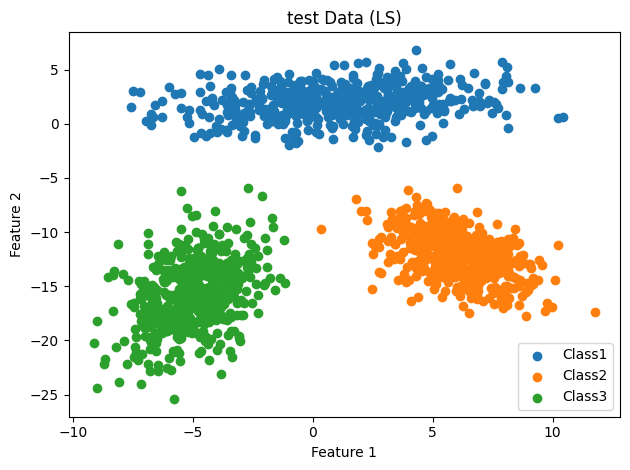

In [ ]:
for cls in classes:
    plt.scatter(dataset1[cls]['x'], dataset1[cls]['y'], label=cls)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('test Data (LS)')
plt.tight_layout()
plt.show()

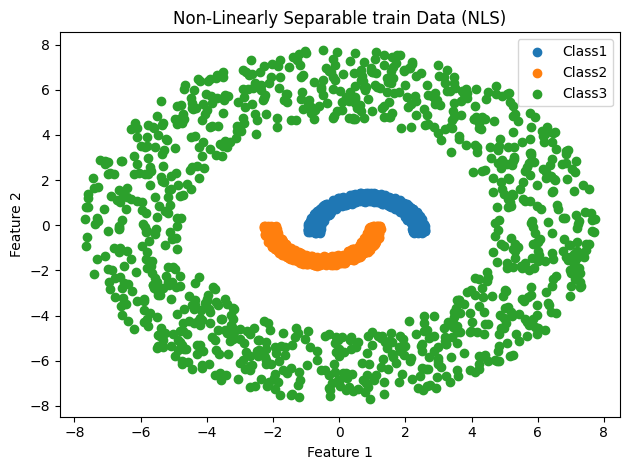

In [ ]:
for cls in classes:
    plt.scatter(dataset2[cls]['x'], dataset2[cls]['y'], label=cls)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Non-Linearly Separable train Data (NLS)')
plt.tight_layout()
plt.show()

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.001):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.lr = learning_rate
        self.err = []
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    def squaredError(self,target,output):
        return 0.5 * np.sum((target - output) ** 2)
    def predict(self, X, threshold=0.5):
        return (self.forward(X) >= threshold).astype(int)
    def learning(self,data,target,n_epochs):
        data = np.array(data)
        target = np.array(target)
        for epoch in range(n_epochs):
            # forward pass
            outputs = self.forward(data)
            err = self.squaredError(target,outputs)
            self.err.append(err)

            # Backward pass
            error_signal = outputs - target
            sigmoid_derivative = outputs * (1 - outputs)
            delta = error_signal * sigmoid_derivative

            # Compute gradients
            grad_weights = np.dot(delta, data)
            grad_bias = np.sum(delta)

            # update Weights
            self.weights -= self.lr * grad_weights
            self.bias -= self.lr * grad_bias

            print(f"Epoch:\t{epoch+1},\tError:\t{err}")

In [ ]:
perceptrons = [Perceptron(2) for _ in range(3)]

X = [pd.concat([dataset1['Class1'], dataset1['Class2']]),
     pd.concat([dataset1['Class2'], dataset1['Class3']]),
     pd.concat([dataset1['Class1'], dataset1['Class3']])]

Y = np.array([[1]*len(dataset1['Class1']) + [0]*len(dataset1['Class2']),
              [1]*len(dataset1['Class2']) + [0]*len(dataset1['Class3']),
              [1]*len(dataset1['Class1']) + [0]*len(dataset1['Class3'])])
plotArr = []
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X[i], Y[i], test_size=0.3, random_state=42)
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    print("-"*25)
    print(f"Training to detect Class {i+1}")
    perceptrons[i].learning(X_train,y_train,150)
    y_pred = perceptrons[i].predict(X_test)
    print(f"Accuracy for Class {i+1}: {accuracy_score(y_test, y_pred)}")
    print("-"*25)
    plotArr.append((y_test,y_pred))


-------------------------
Training to detect Class 1
Epoch:	1,	Error:	25.88873551399471
Epoch:	2,	Error:	25.124149574912284
Epoch:	3,	Error:	24.389288153779237
Epoch:	4,	Error:	23.66945207346955
Epoch:	5,	Error:	22.955929329892925
Epoch:	6,	Error:	22.243668341001037
Epoch:	7,	Error:	21.530159538553203
Epoch:	8,	Error:	20.81488619842135
Epoch:	9,	Error:	20.09903249432132
Epoch:	10,	Error:	19.385272501445016
Epoch:	11,	Error:	18.677529716640308
Epoch:	12,	Error:	17.98064223738438
Epoch:	13,	Error:	17.29991709895291
Epoch:	14,	Error:	16.6406123772847
Epoch:	15,	Error:	16.00743246148776
Epoch:	16,	Error:	15.404136111721865
Epoch:	17,	Error:	14.833326637568696
Epoch:	18,	Error:	14.296434288139801
Epoch:	19,	Error:	13.793846106241425
Epoch:	20,	Error:	13.32511349204468
Epoch:	21,	Error:	12.88917457012003
Epoch:	22,	Error:	12.484552078463562
Epoch:	23,	Error:	12.109511368126196
Epoch:	24,	Error:	11.762178683568738
Epoch:	25,	Error:	11.440626619385148
Epoch:	26,	Error:	11.142934664139744
Epoch

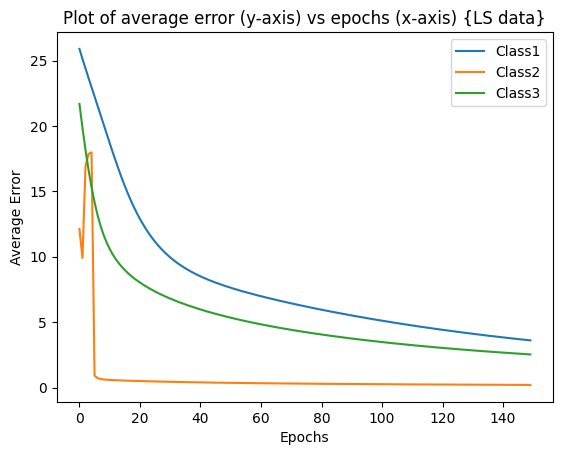

In [ ]:
for i in range(3):
    plt.plot(perceptrons[i].err, label=classes[i])
plt.title("Plot of average error (y-axis) vs epochs (x-axis) {LS data}")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.legend()
plt.show()

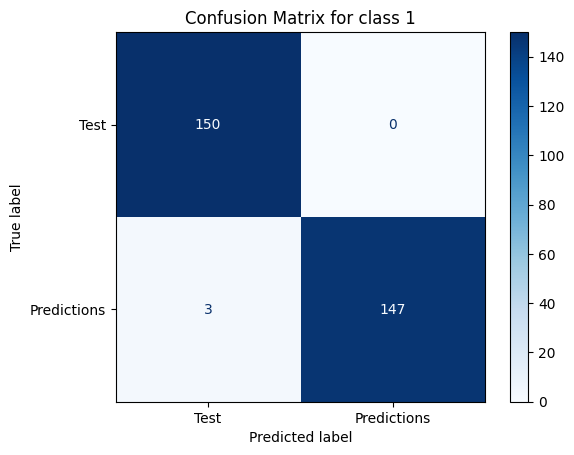

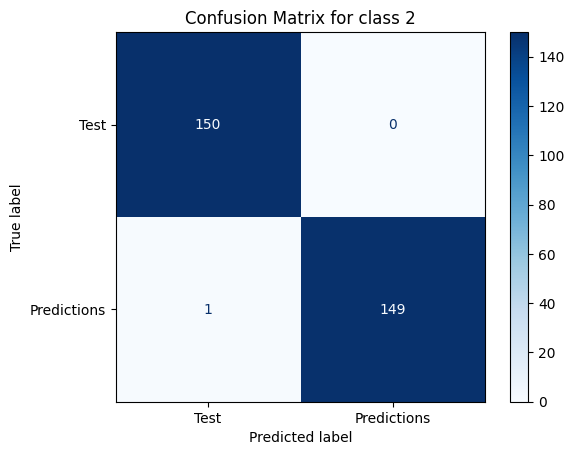

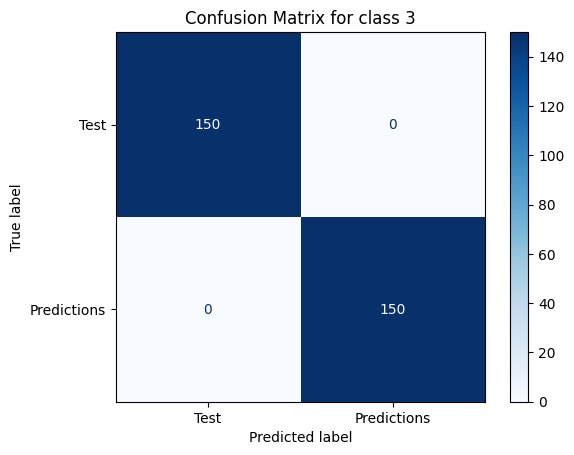

In [ ]:
for i in range(len(plotArr)):
    y_test,y_pred = plotArr[i]
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Test", "Predictions"])
    disp.plot(cmap="Blues", values_format="d")  # 'd' for integer formatting
    plt.title(f"Confusion Matrix for class {i+1}")
    plt.show()

In [ ]:
x_min, x_max = -10,10
y_min, y_max = -26,10
def plot_decision_regions(X,y, model, resolution=0.02):
    # Create a mesh grid

    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

    # Predict for each point in the grid
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot decision regions
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap="viridis")

    # Plot training data
    scatter = plt.scatter(X[:, 0], X[:, 1],c=y, edgecolors='k', cmap="viridis")

    plt.xlabel("Feature 1")
    plt.xlim(-10,10)
    plt.ylim(-26,10)
    plt.ylabel("Feature 2")
    plt.title("Decision Regions with Training Data")
    plt.show()

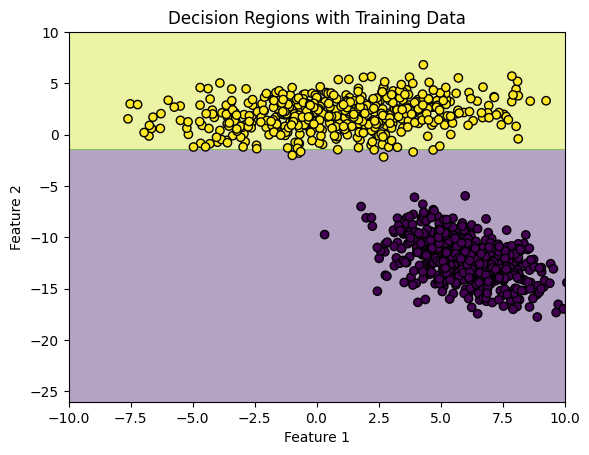

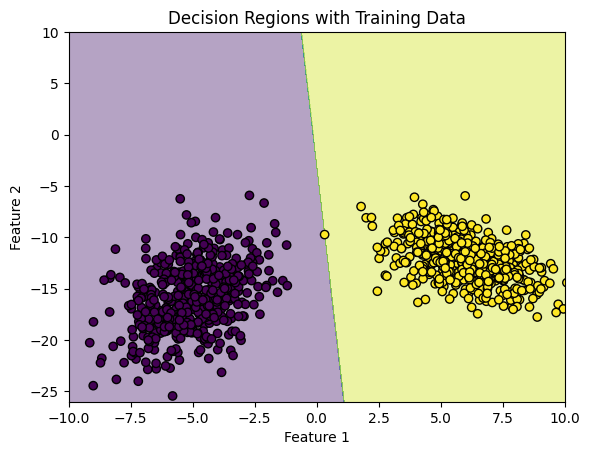

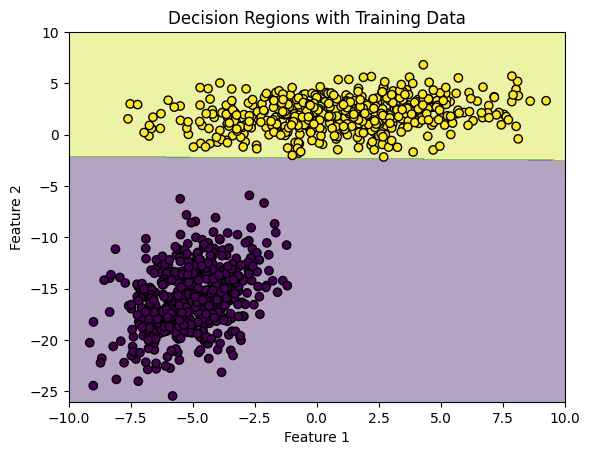

In [ ]:
for i in range(3):
    plot_decision_regions(np.array(X[i]),Y[i], perceptrons[i])

In [ ]:
from matplotlib.colors import ListedColormap

def predict_combined(grid, perc_12, perc_23, perc_31):
    """Vectorized prediction for combined decision boundary"""
    # Get predictions from all three perceptrons
    pred_12 = perc_12.predict(grid)
    pred_23 = perc_23.predict(grid)
    pred_31 = perc_31.predict(grid)

    # Initialize votes matrix
    votes = np.zeros((grid.shape[0], 3))  # Columns: class1, class2, class3

    # Tally votes using vectorized operations
    votes[:, 0] += pred_12  # perc_12 votes for Class 1
    votes[:, 1] += (1 - pred_12)  # perc_12 votes for Class 2
    votes[:, 1] += pred_23  # perc_23 votes for Class 2
    votes[:, 2] += (1 - pred_23)  # perc_23 votes for Class 3
    votes[:, 2] += pred_31  # perc_31 votes for Class 3
    votes[:, 0] += (1 - pred_31)  # perc_31 votes for Class 1

    # Return class with maximum votes (break ties with class1)
    return np.argmax(votes, axis=1) + 1  # Convert 0-based index to class labels (1-3)

def plot_combined_boundary(X, y, perc_12, perc_23, perc_31, resolution=0.02):
    """Plot combined decision boundary"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Vectorized grid prediction
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_combined(grid, perc_12, perc_23, perc_31)
    Z = Z.reshape(xx.shape)

    # Create custom colormap for better visualization
    cmap = ListedColormap(['#FF9999', '#99FF99', '#9999FF'])

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

    # Plot training data with proper class colors
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y-1, cmap=cmap,
                           edgecolors='k', s=30)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Improved Combined Decision Boundary")

    # Add legend for clarity
    handles = scatter.legend_elements()[0]
    labels = ['Class 1', 'Class 2', 'Class 3']
    plt.legend(handles=handles, labels=labels)

    plt.show()

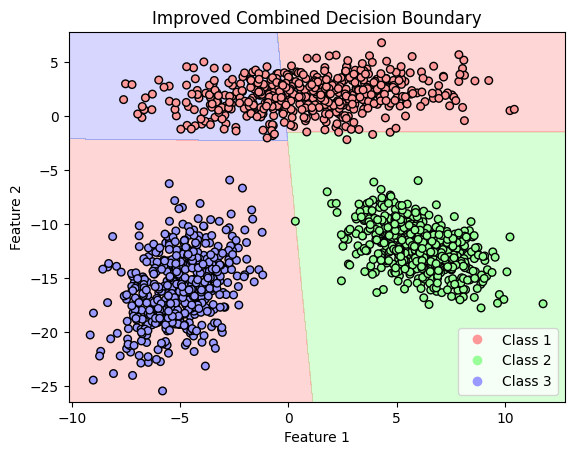

In [ ]:
x = pd.concat([dataset1['Class1'], dataset1['Class2'], dataset1['Class3']]).to_numpy()
y = np.concatenate([np.ones(len(dataset1['Class1'])),
                    np.ones(len(dataset1['Class2'])) * 2,
                    np.ones(len(dataset1['Class3'])) * 3])
plot_combined_boundary(x, y, perceptrons[0], perceptrons[1], perceptrons[2])


In [ ]:
# def predict_combined(x, perc_12, perc_23,perc_31):
#     """
#     Combine predictions from three pairwise perceptrons.
#     perc_12: Class 1 vs Class 2
#     perc_13: Class 1 vs Class 3
#     perc_23: Class 2 vs Class 3
#     """
#     votes = []

#     # Perceptron 1-2 votes for 1 or 2
#     pred_12 = perc_12.predict(x)
#     votes.append(1 if pred_12 == 0 else 2)

#     # Perceptron 2-3 votes for 2 or 3
#     pred_23 = perc_23.predict(x)
#     votes.append(2 if pred_23 == 0 else 3)


#     # Perceptron 1-3 votes for 1 or 3
#     pred_31 = perc_31.predict(x)
#     votes.append(3 if pred_31 == 0 else 1)

#     # Return class with the most votes (break ties with class 1)
#     return max(set(votes), key=votes.count)
# def plot_combined_decision_boundary(X, y, perc_12, perc_23, perc_31, resolution=0.02):
#     # Create mesh grid
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
#                          np.arange(y_min, y_max, resolution))

#     # Predict for all points in the grid
#     Z = np.array([predict_combined(np.array([[x, y]]), perc_12, perc_31, perc_23)
#                   for x, y in zip(xx.ravel(), yy.ravel())])
#     Z = Z.reshape(xx.shape)

#     # Plot decision regions
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")

#     # Plot training data
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="viridis")
#     plt.xlabel("Feature 1")
#     plt.ylabel("Feature 2")
#     plt.title("Combined Decision Boundary (3-Class)")
#     plt.show()

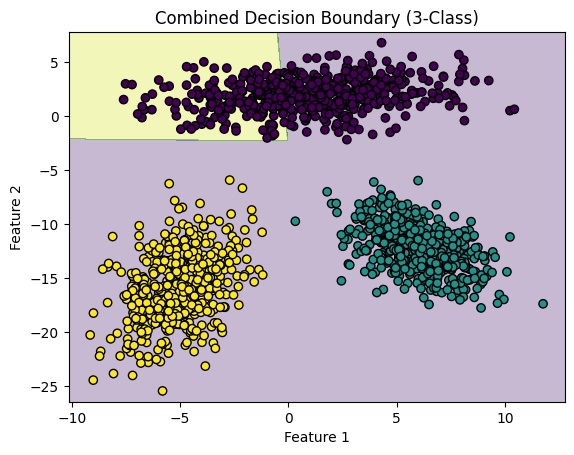

In [ ]:
x = pd.concat([dataset1['Class1'], dataset1['Class2'],dataset1['Class3']]).to_numpy()
y = np.concatenate([np.ones(len(dataset1['Class1'])), np.ones(len(dataset1['Class2']))*2,np.ones(len(dataset1['Class3']))*3])
plot_combined_decision_boundary(x,y,perceptrons[0],perceptrons[1],perceptrons[2])

In [ ]:
NLS_precep = [Perceptron(2) for _ in range(3)]
X = [pd.concat([dataset2['Class1'], dataset2['Class2']]),
     pd.concat([dataset2['Class2'], dataset2['Class3']]),
     pd.concat([dataset2['Class1'], dataset2['Class3']])]

Y = [np.concatenate([np.ones(len(dataset2['Class1'])), np.zeros(len(dataset2['Class2']))]),
     np.concatenate([np.ones(len(dataset2['Class2'])), np.zeros(len(dataset2['Class3']))]),
     np.concatenate([np.ones(len(dataset2['Class1'])), np.zeros(len(dataset2['Class3']))])]
plotArr_NLS = []
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X[i], Y[i], test_size=0.3, random_state=42)
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    print("-"*25)
    print(f"Training to detect Class {i+1}")
    NLS_precep[i].learning(X_train,y_train,150)
    y_pred = NLS_precep[i].predict(X_test)
    print(f"Accuracy for Class {i+1}: {accuracy_score(y_test, y_pred)}")
    print("-"*25)
    plotArr_NLS.append((y_test,y_pred))

-------------------------
Training to detect Class 1
Epoch:	1,	Error:	65.6573455849615
Epoch:	2,	Error:	60.612975602930625
Epoch:	3,	Error:	56.37742540725315
Epoch:	4,	Error:	52.81250824029121
Epoch:	5,	Error:	49.79637371425294
Epoch:	6,	Error:	47.226773474001924
Epoch:	7,	Error:	45.020347557770435
Epoch:	8,	Error:	43.11019590333572
Epoch:	9,	Error:	41.443015164483754
Epoch:	10,	Error:	39.976407319173475
Epoch:	11,	Error:	38.67658482495686
Epoch:	12,	Error:	37.51650938094693
Epoch:	13,	Error:	36.47442256500318
Epoch:	14,	Error:	35.53270218575271
Epoch:	15,	Error:	34.67697794661004
Epoch:	16,	Error:	33.89544882485947
Epoch:	17,	Error:	33.17835547209321
Epoch:	18,	Error:	32.51757110023363
Epoch:	19,	Error:	31.90628280923836
Epoch:	20,	Error:	31.33874204442926
Epoch:	21,	Error:	30.810068057839736
Epoch:	22,	Error:	30.31609218207963
Epoch:	23,	Error:	29.853233685570668
Epoch:	24,	Error:	29.418400198234988
Epoch:	25,	Error:	29.008907361360393
Epoch:	26,	Error:	28.622413605559892
Epoch:	27,	

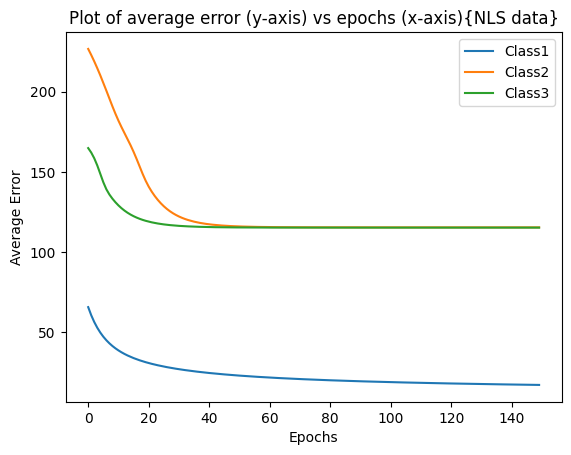

In [ ]:
for i in range(3):
    plt.plot(NLS_precep[i].err, label=classes[i])
plt.title("Plot of average error (y-axis) vs epochs (x-axis){NLS data}")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.legend()
plt.show()

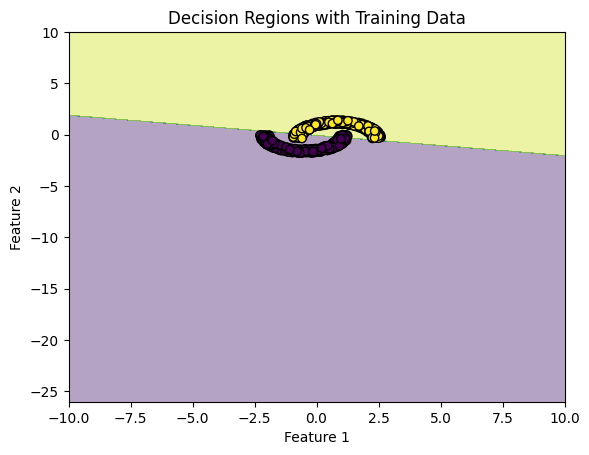

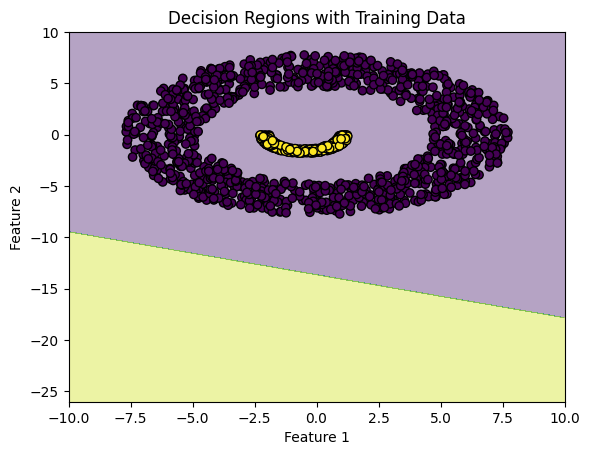

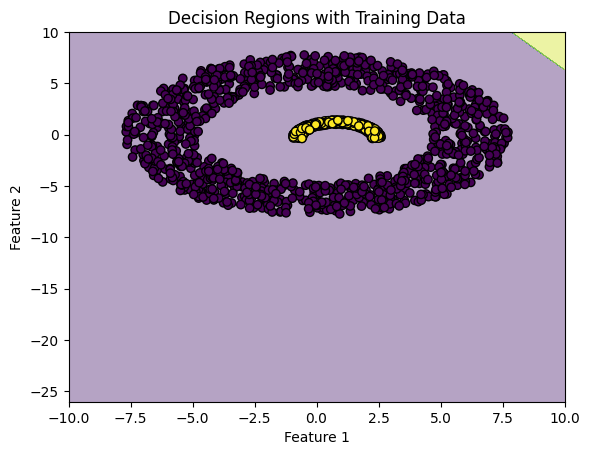

In [ ]:
for i in range(3):
    plot_decision_regions(np.array(X[i]),Y[i], NLS_precep[i])